# 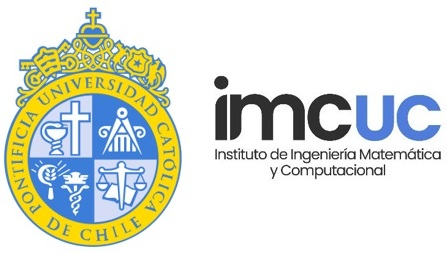  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 07: Actividad de Integración</center></h1>

Esta actividad busca que conecten el trabajo de agrupación y resumen, junto con el poder resumir estadísticas y visualización básica.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 07". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. 
    
**La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Para esta actividad usaremos una base de datos de calidad de vino generada por Crtex et al. para su paper "Modeling wine preferences by data mining from physicochemical properties". Pueden encontrar el paper acá: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub.

En la carpeta `data` están los dos archivos de datos, que fueron donados al repositorio de datos para Machine Learning de UC Irvine (https://archive.ics.uci.edu/dataset/186/wine+quality), además de un archivo de texto que explica algunos detalles de los datos disponibles en los archivos `.csv`.

## Rúbrica

- Si han logrado el punto 1: 3.0
- Si han logrado hasta el punto 2: 5.0
- Si han logrado hasta el punto 3 en forma parcial: 6.0
- Si han logrado todo: 7.0

In [1]:
# librerías necesarias para el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos unificada

### 1.1 Lectura
Lea cada uno de los dos archivos `.csv` de la carpeta, dejando la información en un DataFrame para cada uno. Antes de hacer esto no olvide revisar el archivo CSV para ver el tipo de separador que se usa.

### 1.2 Revisión inicial
Revise qué tipos de datos tiene cada columna y asegúrese que sea el tipo adecuado. ¿Hay datos faltantes o nulos?

### 1.3 Base unificada
Junte ambos DataFrames en un único DataFrame llamado `datos_vino` que permita identificar el tipo de vino al que corresponde cada fila.

In [2]:
# leer archivos considerando que el separador es ; en vez de ,
red = pd.read_csv('data\winequality-red.csv', sep=';')
white = pd.read_csv('data\winequality-white.csv', sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Vemos que hay 1599 datos para vino tinto y 4898 para vino blanco, siendo todos no-nulos.

In [7]:
# agregar ua columna de tipo de vino para segmentar ambos grupos
red['type'] = 'red'
white['type'] = 'white'

In [8]:
# concatenar los dataframes en uno solo
datos_vino = pd.concat([red, white])
datos_vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 2. Revisión de la base

Las siguientes actividades debe realizarlas sobre el DataFrame `datos_vino`.

### 2.1 Análisis de la base compelta
Realice las siguientes actividades:
- a. Conteste: ¿Cuántos datos en total tiene la base?
- b. Calcule el valor promedio y desviación estándar de todas las columnas con datos numéricos.
- c. Conteste: ¿Cuántos valores diferentes de `calidad` hay en la base?

### 2.2 Agrupaciones
Usando algún método de agrupación, como tablas pivote o agrupaciones, conteste:
- a. ¿Hay diferencia en el pH promedio de los vinos rojos y blancos?
- b. ¿Hay diferencia en el valor promedio y la varianza del nivel de alcohol que tienen los vinos rojos y blancos?

In [9]:
# 2.1.a
datos_vino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


Vemos que hay 6497 datos, todos ellos no-nulos en cada columna

In [10]:
# 2.1.b el siguiente comando nos entrega el promedio y desviación estándar de todas las columnas numéricas.
datos_vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
# 2.1.c
datos_vino['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Vemos que hay 7 niveles de calidad de vino en esta base, que van desde el valor 3 hasta el valor 9.

In [12]:
# 2.2 a
datos_vino.groupby(by=['type']).agg({'pH':['mean']})

,pH
,mean
type,
red,3.311113
white,3.188267


Vemos que el pH promedio es similar entre ambos tipos de vino, siendo 3.3 en en vino tinto y 3.2 en el vino blanco.

In [13]:
# 2.2 b
datos_vino.groupby(by=['type']).agg({'alcohol':['mean', 'var']})

alcohol          
            mean       var
type                      
red    10.422983  1.135647
white  10.514267  1.514427

Vemos que el nivel de alcohol promedio se parece, y el vino blanco tiene una varianza levemente mayor.

## 3. Análisis exploratorio

Las siguientes actividades debe realizarlas sobre el DataFrame `datos_vino`.

### 3.1 Estadísticas de resumen
Conteste las siguientes preguntas para los vinos rojos:
- a. ¿Cuál es la varianza de la cantidad residual de azúcar que tiene ese tipo de vino?
- b. ¿Cual es el valor mínimo de pH que tiene el decil más alto? (el decil más alto es lo mismo que el percentil 90).
- c. ¿Cuál es el coefficiente de correlación entre la calidad del vino y el nivel de alcohol?
- d. ¿Qué implica ese valor de correlación?

### 3.2 Visualización
Para los vinos blancos, realice las siguientes actividades de visualización. No olvide poner nombres en los ejes.

- a. Grafique la distribución de valores de calidad de los vinos en la base de datos.
- b. Haga un `scatter plot` que permita ver la relación entre el nivel de alcohol de los vinos blancos y su puntaje de caldiad. ¿Observa alguna relación? ¿Hay algún dato que podría considerar como `outlier`?

In [14]:
# 3.1 a
datos_vino.groupby(by=['type']).agg({'residual sugar':['var']})

,residual sugar
,var
type,
red,1.987897
white,25.725770


Podemos filtrar por el tipo de vino o simplemente agrupar y con ello sacar el valor. En este caso, vemos que la varianza del azúcar residual en el vino tinto es de 1.99, mucho más baja que la del vino blanco.

In [15]:
# 3.1 b
datos_vino[datos_vino['type']=='red']['pH'].quantile(0.90)

3.51

Vemos que el decil más alto posee un pH de 3.51.

In [16]:
# 3.1 c
corr = datos_vino[datos_vino['type']=='red']['alcohol'].corr(datos_vino[datos_vino['type']=='red']['quality'])
corr

0.4761663240011354

Vemos que el coeficiente de correlación es de 0.476

**pregunta 3.1 d**

Esto implica que hay una relación levemente positiva entre el nivel de alcohol y la calidad del vino, es decir, mientras más alcohol tiene, hay un aumento en el valor del índice de calidad.

[(0.0, 9.0)]

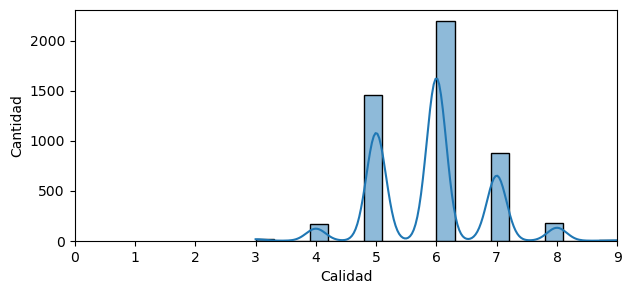

In [17]:
# 3.2 a
fig, ax = plt.subplots(1, 1, figsize=(7,3))
ax = sns.histplot(data=datos_vino[datos_vino['type']=='white'], x='quality', bins=20, kde=True)
ax.set_xlabel('Calidad')
ax.set_ylabel('Cantidad')
ax.set(xlim=(0, 9))

Text(0, 0.5, 'Alcohol')

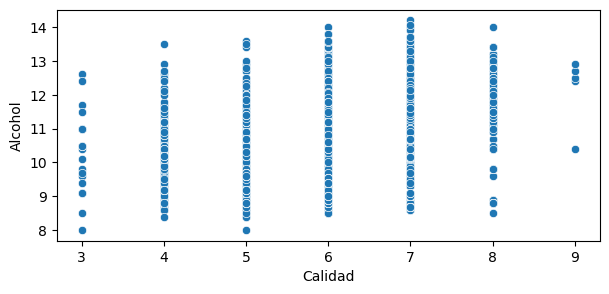

In [18]:
# 3.2 b
fig, ax = plt.subplots(1, 1, figsize=(7,3))
ax = sns.scatterplot(x = 'quality', y = 'alcohol', data=datos_vino[datos_vino['type']=='white'])
ax.set_xlabel('Calidad')
ax.set_ylabel('Alcohol')

Vemos que, tal como identificamos al calcular la correlación, hay una relación positiva entre el índice de calidad y el nivel de alcohol. Si bien no parece haber algo muy extremo, hay un dato de vino con valor de calidad 9 pero un bajo nivel de alcohol que resalta en ese grupo. Veremos cuando estudiemos gráficos de boxplot, cómo poder definir si este dato (u otro) es un dato outlier o no.